In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('precision', 3)
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Extra imports
from numpy.random import  uniform,normal
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from numpy.random import multivariate_normal
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture


In [3]:
np.random.seed(7)

## Clustering with k-means

Let's create an artificial 2D dataset:

In [4]:
N1 = 30
N2 = 40
N3 = 50

cluster 1

In [5]:
x1 = normal (1,0.5,N1)
y1 = normal (1,0.5,N1)

 cluster 2

In [6]:
x2 = normal (2,0.5,N2)
y2 = normal (6,0.7,N2)

cluster 3

In [7]:
x3 = normal (7,1,N3)
y3 = normal (7,1,N3)

Data:

In [8]:
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
c = np.array([0] * N1 + [1] * N2 + [2] *N3)
D = pd.DataFrame({'X1':x, 'Y1':y, 'C':c})

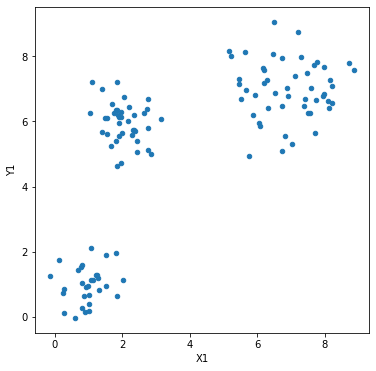

In [9]:
D.plot.scatter(x='X1', y='Y1',figsize=(6,6));

The true clusters:

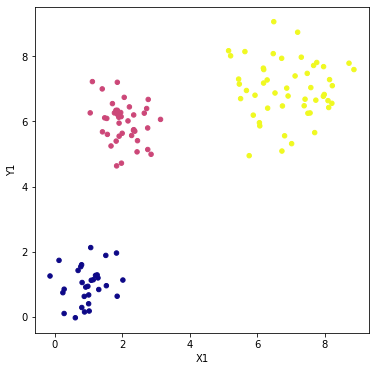

In [10]:
D.plot.scatter(x='X1', 
               y='Y1',
               c='C', 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

Let's execute k-means, k = 3 because we have 3 clusters

In [11]:
K = 3
kmeans_3 = KMeans(n_clusters=K,max_iter=100)
kmeans_3.fit(D.loc[:,['X1','Y1']]);

Plot and paint the clusters and plot the cluster centers

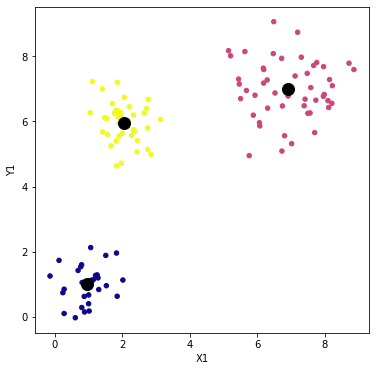

In [13]:
D.plot.scatter(x='X1', y='Y1', c=kmeans_3.labels_, colormap='plasma', figsize=(6,6),
               colorbar=False)
plt.plot(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], 'ko', markersize=12);

I'm going to use the Calinski-Harabasz index to measure the clustering quality. Keeping in mind that a good clustering has small SSW (compact clusters) and large SSB (separated cluster centers):

The CH index is then:

 $CH = \frac{SSB/(K-1)}{SSW/(N-K)}$

 where $N$ is the number of data points and $K$ is the number of clusters

In [14]:
CH_3 = calinski_harabasz_score(D.loc[:,['X1','Y1']], kmeans_3.labels_ )
CH_3

728.0901256606564

If we try to increase the number of clusters then we should get a worse score because we are stepping out of the truth of the clusters. Following the same steps as above:

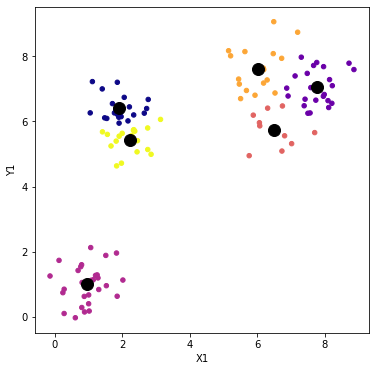

In [27]:
K = 6
kmeans_6 = KMeans(n_clusters=K,max_iter=100)
kmeans_6.fit(D.loc[:,['X1','Y1']]);

D.plot.scatter(x='X1', y='Y1', c=kmeans_6.labels_, colormap='plasma', figsize=(6,6),
               colorbar=False)
plt.plot(kmeans_6.cluster_centers_[:,0], kmeans_6.cluster_centers_[:,1], 'ko', markersize=12);

Calinski-Harabasz score: 
CH.3 > CH.6, so K=3 is better according to C-H

In [28]:
CH_6 = calinski_harabasz_score(D.loc[:,['X1','Y1']], kmeans_6.labels_)
CH_6

609.587286258919

## Clustering with k-means and E-M

The data is a mixture of 5 Gaussians, the rotation makes the two variables dependent with different variances while the centers and coefficients of the mixture were chosen randomly

In [47]:
np.random.seed(26)
K=5 
N=2000
center = np.array((0,0))
dispersion = 30
mu_k = multivariate_normal(center, np.eye(2)*dispersion,K)
pi_k = uniform(0.2,1.5,size=K)
data, labels = make_blobs(n_samples=N,n_features=2, centers=mu_k, cluster_std=pi_k)
# Rotate and scale
data = np.dot(data, np.array([[1,0.2],[0.6,1.8]])) 
# Rotate and scale
mu_k = np.dot(mu_k, np.array([[1,0.2],[0.6,1.8]])) 

data = np.vstack((data[labels==0][:400], data[labels==1][:300], 
                  data[labels==2][:125], data[labels==3][:100], 
                  data[labels==4][:75]))
labels=np.array([0]*400+[1]*300+[2]*125+[3]*100+[4]*75)
d = pd.DataFrame({'X1': data[:,0], 'Y1':data[:,1], 'labels':labels})

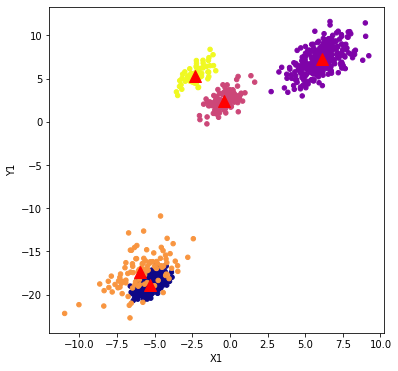

In [48]:
d.plot.scatter(x='X1',  y='Y1', c=labels, colormap='plasma', figsize=(6,6),
               colorbar=False)
plt.plot(mu_k[:,0], mu_k[:,1], 'r^', markersize=12);

Let's see the kernel density, which is what the clustering method sees, and a contour plot of the unconditional density

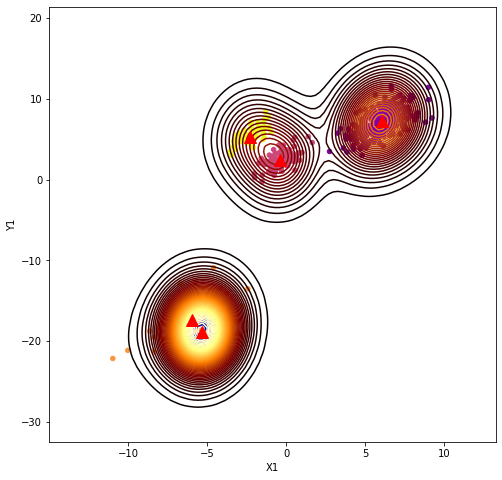

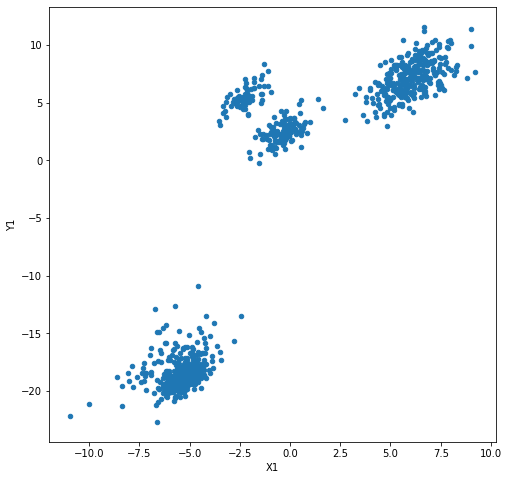

In [51]:
d.plot.scatter(x='X1', y='Y1', c=labels, colormap='plasma', figsize=(8,8),colorbar=False)
plt.plot(mu_k[:,0], mu_k[:,1], 'r^', markersize=12);
sns.kdeplot(d.X1,d.Y1, n_levels=50,cmap='afmhot');
d.plot.scatter(x='X1', y='Y1', figsize=(8,8));

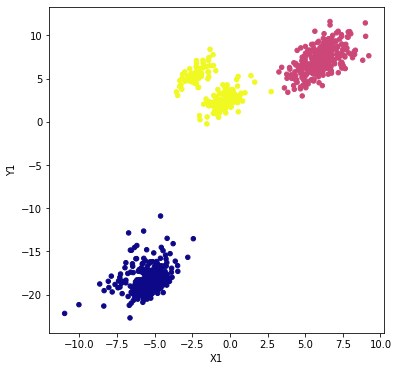

In [117]:
K=3
kmeans_3 = KMeans(n_clusters=K,max_iter=100)
kmeans_3.fit(d.loc[:,['X1','Y1']]);
d.plot.scatter(x='X1', y='Y1',c=kmeans_3.labels_, colormap='plasma', 
               figsize=(6,6),colorbar=False);

We know there are 5 clusters so why do this? We need to assess again with the help of the Calinski-Harabasz index if this is good quality.

In [118]:
CH_3 = calinski_harabasz_score(d.loc[:,['X1','Y1']], kmeans_3.labels_)
CH_3

28118.155380972286

We can compare it with the truth: K=5

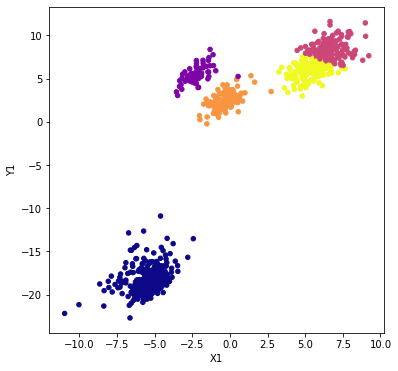

In [119]:
K=5
kmeans3_5 = KMeans(n_clusters=K,max_iter=100)
kmeans3_5.fit(d.loc[:,['X1','Y1']]);
d.plot.scatter(x='X1', y='Y1', c=kmeans3_5.labels_, colormap='plasma', 
               figsize=(6,6),colorbar=False);

There are even more chances of being largely incorrect because there are more ways of getting a wrong solution so:

In [121]:
kmeans3_5 = KMeans(n_clusters=K,max_iter=100,n_init=100)
kmeans3_5.fit(d.loc[:,['X1','Y1']])
CH3_5 = calinski_harabasz_score(d.loc[:,['X1','Y1']], 
                               kmeans2_5.labels_ )
CH3_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

22619.90643751722

Something's happening because CH_3 > CH3_5 which has the truth, 5 clusters... if we look at the plot though, especially the one with the kernel density is that it "sees" 3, even though there are 5 in truth. So we find the optimal K there. So important to do plots and visualize.

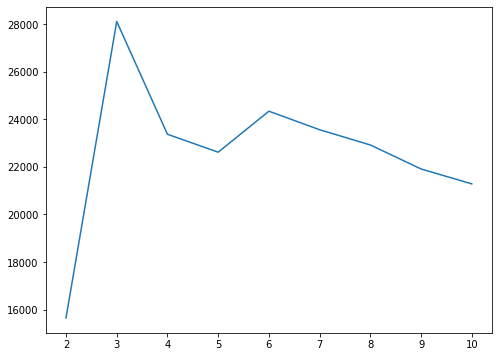

In [123]:
r = []
for i in range(2,11):
    km = KMeans(n_clusters=i,max_iter=100,n_init=100).fit(d.loc[:,['X1','Y1']])
    r.append(calinski_harabasz_score(d.loc[:,['X1','Y1']], km.labels_ ))
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(range(2,11),r);

the conclusion is that k-means + C-H bet for 3 clusters. The real *shape* of the clusters cannot be captured, because k-means only "sees" spherical clusters and these are ellipsoidal. I'm going to try E-M for mixture densities, including mixtures of Gaussians
we can specify which family of gaussians we intend to fit:

* "full" each component has full covariance matrix, "diagonal" covariances are diagonal (just variance), 

*  "spherical"  each component has his own diagonal univariance and "tied" all components share variance

In [124]:
gm =GaussianMixture(n_components=5, 
                    covariance_type='diag').fit(d.loc[:,['X1','Y1']])
print('BIC=', gm.bic(d.loc[:,['X1','Y1']]))
print('\nLOG Likelihood=', gm.lower_bound_)
print('\nWEIGHTS=')
pd.DataFrame(gm.weights_)
print('\nMEANS=')
pd.DataFrame(gm.means_)
print('\nCOV=')
pd.DataFrame(gm.covariances_)

BIC= 7977.909837301626

LOG Likelihood= -3.906596306305908

WEIGHTS=


,0
0,0.388
1,0.125
2,0.300
3,0.112
4,0.075



MEANS=


,0,1
0,-5.351,-18.851
1,-0.331,2.450
2,5.997,7.137
3,-5.702,-17.477
4,-2.253,5.452



COV=


,0,1
0,0.235,0.512
1,0.411,0.917
2,1.160,2.396
3,2.044,4.158
4,0.332,0.900


 This is a graphical summary of the clustering

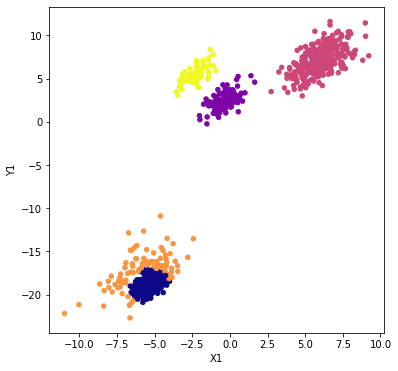

In [125]:
d.plot.scatter(x='X1', y='Y1',c=gm.predict(d.loc[:,['X1','Y1']]), colormap='plasma', 
               figsize=(6,6),colorbar=False);

 it was very likely that E-M performed extremely well
 why? because we knew the truth (cluster form and number)

 suppose now we do not the know the truth but we still wish to fit general gaussians

In [126]:
gm =GaussianMixture(n_components=5, 
                    covariance_type='full').fit(d.loc[:,['X1','Y1']])
print('BIC=', gm.bic(d.loc[:,['X1','Y1']]))
print('\nLOG Likelihood=', gm.lower_bound_)
print('\nWEIGHTS=')
pd.DataFrame(gm.weights_)
print('\nMEANS=')
pd.DataFrame(gm.means_)
print('\nCOV=')
gm.covariances_

BIC= 8309.90981979357

LOG Likelihood= -4.055316110766313

WEIGHTS=


,0
0,0.076
1,0.500
2,0.200
3,0.110
4,0.114



MEANS=


,0,1
0,7.008,8.857
1,-5.430,-18.542
2,-1.047,3.578
3,5.157,5.757
4,6.142,7.323



COV=


array([[[ 0.70697589,  0.02846782],
        [ 0.02846782,  1.17503468]],

       [[ 0.66326661,  0.35618327],
        [ 0.35618327,  1.65997047]],

       [[ 1.25933184, -0.99703199],
        [-0.99703199,  3.02155568]],

       [[ 0.61000369,  0.26682247],
        [ 0.26682247,  0.99617865]],

       [[ 0.56249193, -0.10091781],
        [-0.10091781,  0.70038156]]])

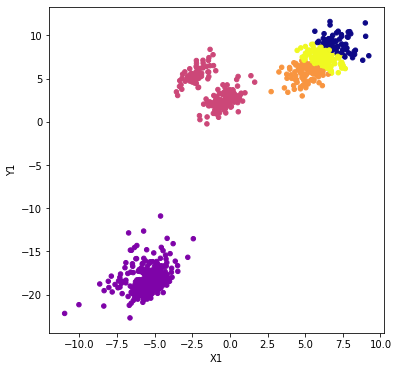

In [127]:
d.plot.scatter(x='X1', y='Y1',
               c=gm.predict(d.loc[:,['X1','Y1']]), 
               colormap='plasma', 
               figsize=(6,6),colorbar=False);

The data is gaussian so I expect this to work well.Compare the estimated centers:

In [134]:
#let's compare
pd.DataFrame(gm.means_)
#with the truth
pd.DataFrame(mu_k)

,0,1
0,7.008,8.857
1,-5.430,-18.542
2,-1.047,3.578
3,5.157,5.757
4,6.142,7.323


,0,1
0,-5.306,-18.924
1,6.086,7.310
2,-0.360,2.428
3,-5.942,-17.380
4,-2.304,5.268


or the estimated coefficients and the truth:

In [132]:
pd.DataFrame(gm.weights_)

c= Counter(labels)
pd.DataFrame(np.array([c[v] for v in c])/1000.0)

,0
0,0.076
1,0.500
2,0.200
3,0.110
4,0.114


,0
0,0.400
1,0.300
2,0.125
3,0.100
4,0.075
